In [1]:

import pandas as pd

df = pd.read_csv('processed_cleveland.csv')
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [2]:
summary = df.describe().T  # Transpose for better readability

# Add count of missing values
summary['missing_values'] = df.isnull().sum()

# Round for cleaner presentation
summary = summary.round(2)

# Display the summary
print(summary)

          count    mean    std    min    25%    50%    75%    max  \
age       303.0   54.44   9.04   29.0   48.0   56.0   61.0   77.0   
sex       303.0    0.68   0.47    0.0    0.0    1.0    1.0    1.0   
cp        303.0    3.16   0.96    1.0    3.0    3.0    4.0    4.0   
trestbps  303.0  131.69  17.60   94.0  120.0  130.0  140.0  200.0   
chol      303.0  246.69  51.78  126.0  211.0  241.0  275.0  564.0   
fbs       303.0    0.15   0.36    0.0    0.0    0.0    0.0    1.0   
restecg   303.0    0.99   0.99    0.0    0.0    1.0    2.0    2.0   
thalach   303.0  149.61  22.88   71.0  133.5  153.0  166.0  202.0   
exang     303.0    0.33   0.47    0.0    0.0    0.0    1.0    1.0   
oldpeak   303.0    1.04   1.16    0.0    0.0    0.8    1.6    6.2   
slope     303.0    1.60   0.62    1.0    1.0    2.0    2.0    3.0   
target    303.0    0.94   1.23    0.0    0.0    0.0    2.0    4.0   

          missing_values  
age                    0  
sex                    0  
cp                   

In [3]:
from IPython.display import display

display(summary)

,count,mean,std,min,25%,50%,75%,max,missing_values
age,303.0,54.44,9.04,29.0,48.0,56.0,61.0,77.0,0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0,0
cp,303.0,3.16,0.96,1.0,3.0,3.0,4.0,4.0,0
trestbps,303.0,131.69,17.60,94.0,120.0,130.0,140.0,200.0,0
chol,303.0,246.69,51.78,126.0,211.0,241.0,275.0,564.0,0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0,0
restecg,303.0,0.99,0.99,0.0,0.0,1.0,2.0,2.0,0
thalach,303.0,149.61,22.88,71.0,133.5,153.0,166.0,202.0,0
exang,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0,0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2,0


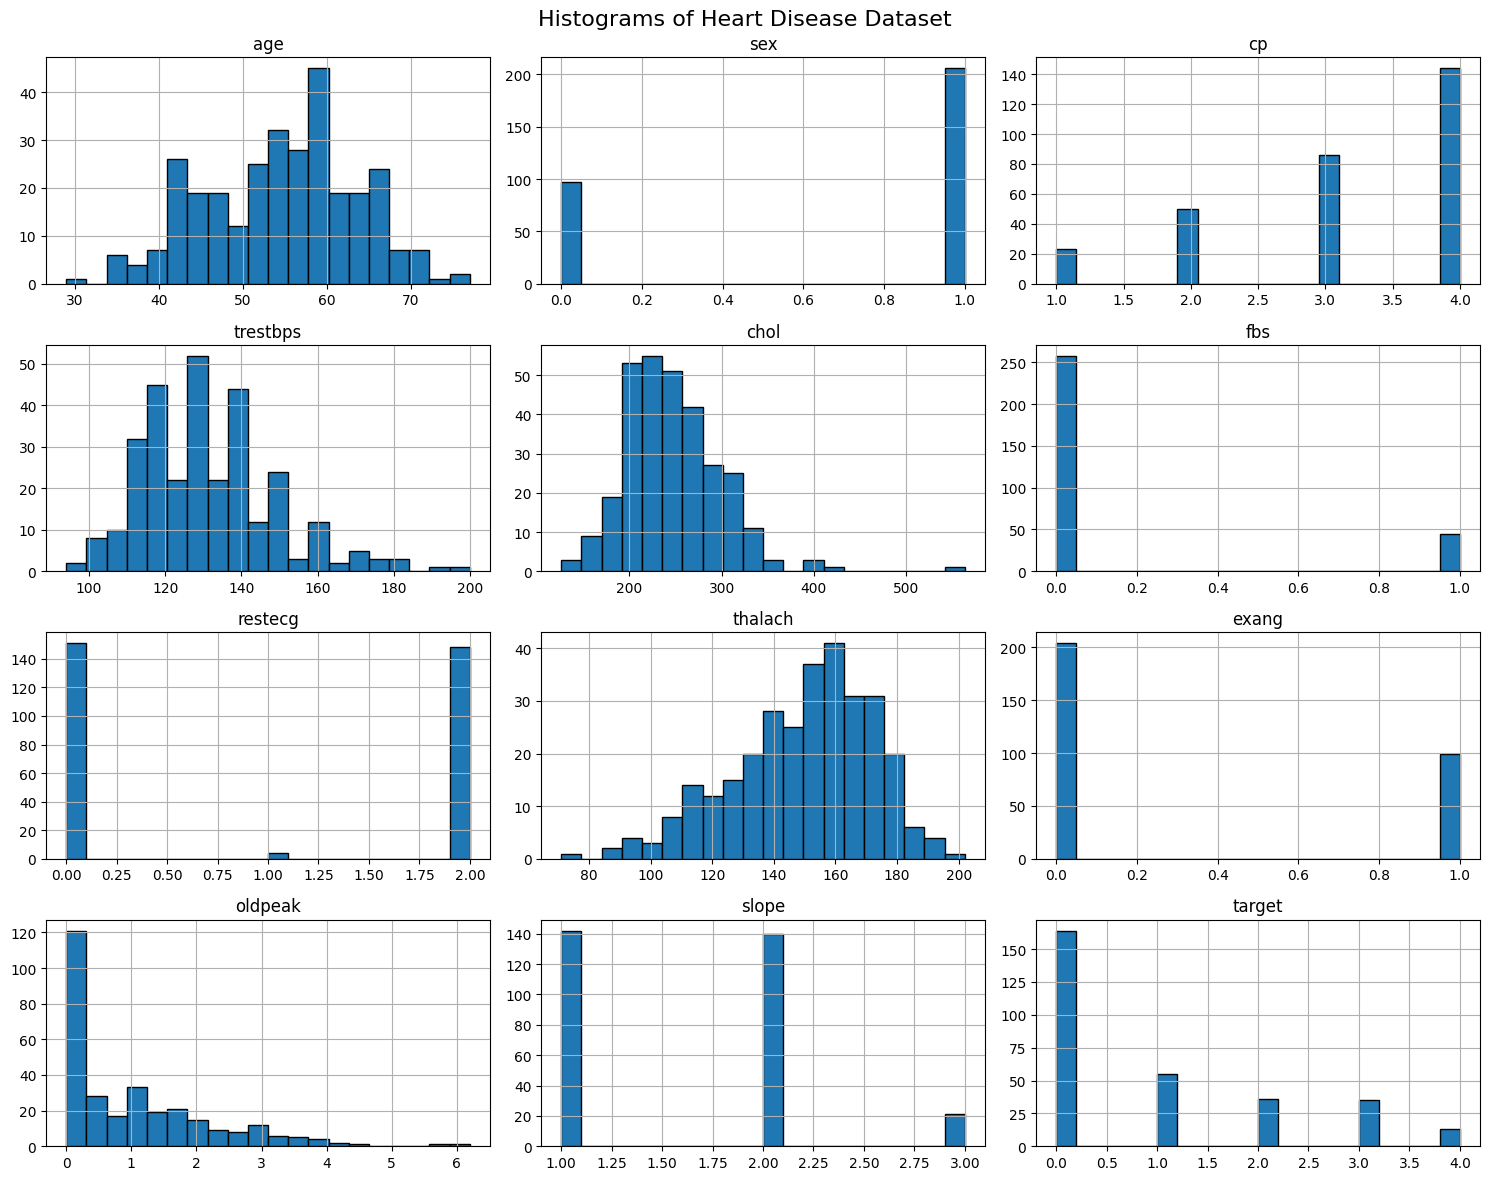

In [7]:
#histogram of heart disease
import matplotlib.pyplot as plt
# Set a large figure size for all plots
df.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histograms of Heart Disease Dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import numpy as np

# Load CSV and replace '?' with NaN
df = pd.read_csv('processed_cleveland.csv', na_values='?')

# Display any non-numeric columns (for confirmation)
print(df.dtypes)
df = df.apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(axis=1)



age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


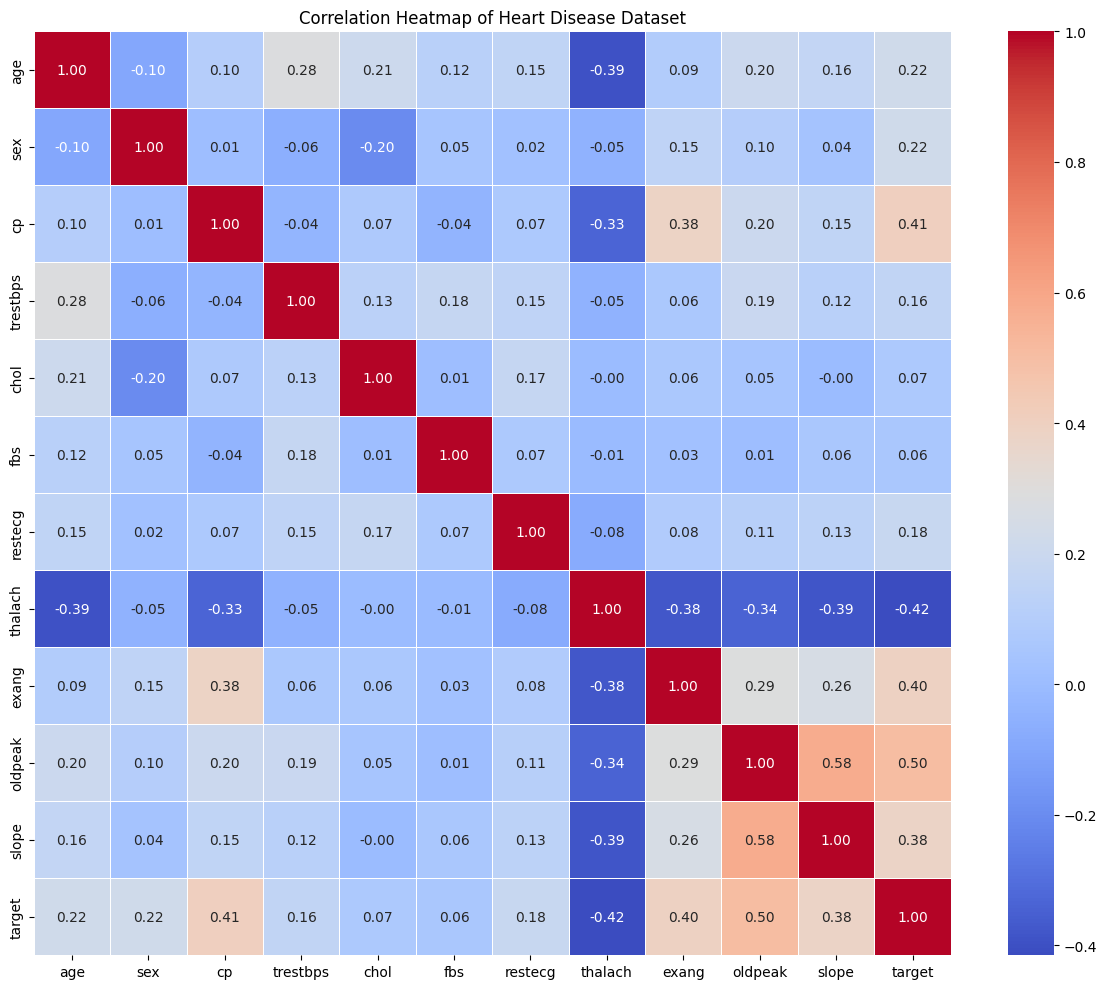

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_clean.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.tight_layout()
plt.show()


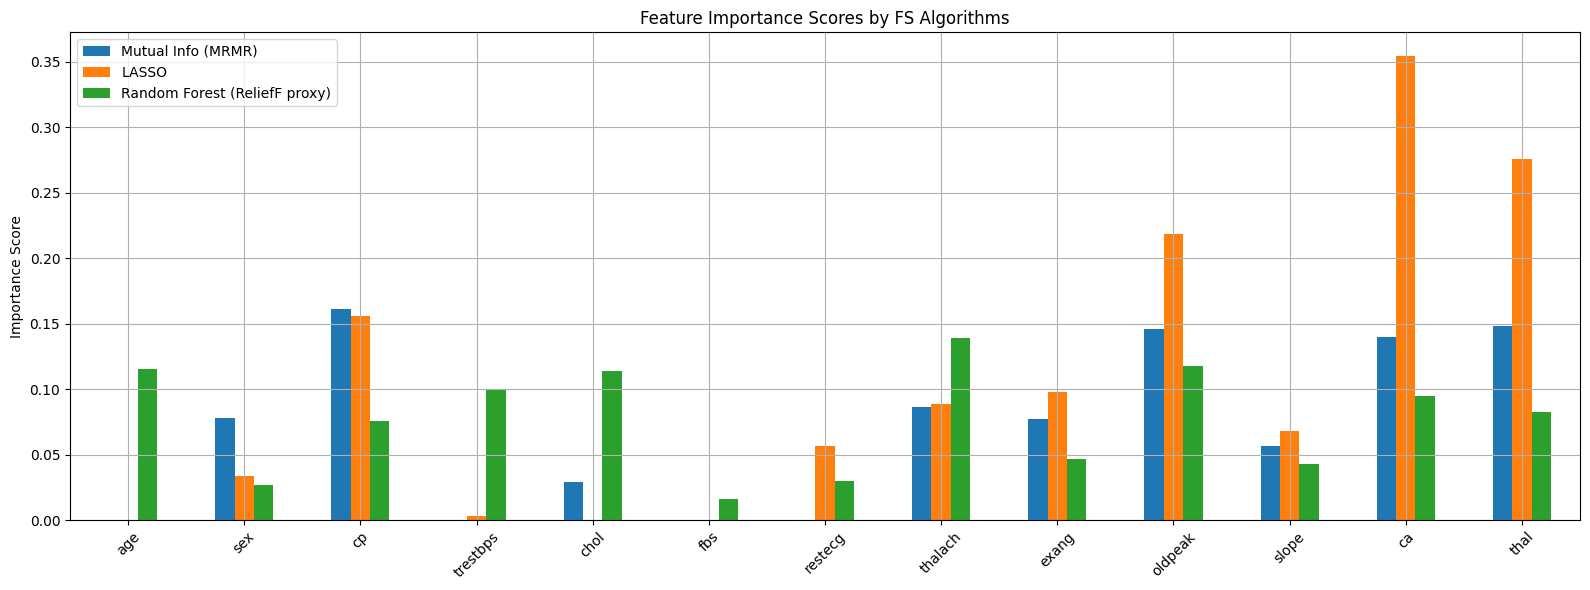

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load and clean dataset
df = pd.read_csv('processed_cleveland.csv', na_values='?')
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Split features and target
X = df.drop(columns='target') if 'target' in df.columns else df.iloc[:, :-1]
y = df['target'] if 'target' in df.columns else df.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Feature selection ---

# 1. Mutual Information (as MRMR proxy)
mi_scores = mutual_info_classif(X_scaled, y)

# 2. LASSO
lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)
lasso_scores = np.abs(lasso.coef_)

# 3. Random Forest (proxy for ReliefF)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)
rf_scores = rf.feature_importances_

# --- Plotting ---
features = X.columns
score_df = pd.DataFrame({
    'Mutual Info (MRMR)': mi_scores,
    'LASSO': lasso_scores,
    'Random Forest (ReliefF proxy)': rf_scores
}, index=features)

score_df.plot(kind='bar', figsize=(16, 6))
plt.title('Feature Importance Scores by FS Algorithms')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



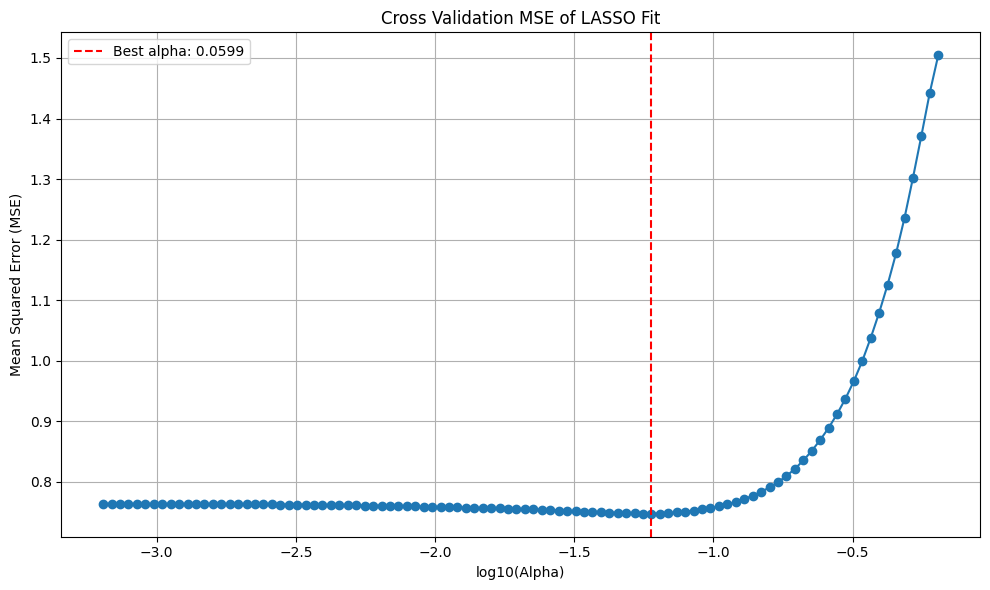

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Load and clean dataset
df = pd.read_csv('processed_cleveland.csv', na_values='?')
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Split features and target
X = df.drop(columns='target') if 'target' in df.columns else df.iloc[:, :-1]
y = df['target'] if 'target' in df.columns else df.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit LASSO with cross-validation
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

# --- Plotting the MSE ---
plt.figure(figsize=(10, 6))
plt.plot(np.log10(lasso.alphas_), lasso.mse_path_.mean(axis=1), marker='o')
plt.axvline(np.log10(lasso.alpha_), color='r', linestyle='--', label=f"Best alpha: {lasso.alpha_:.4f}")
plt.xlabel("log10(Alpha)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cross Validation MSE of LASSO Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-26-146aa76a1f06>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fcmim_df, x='Feature', y='Score', palette='viridis')


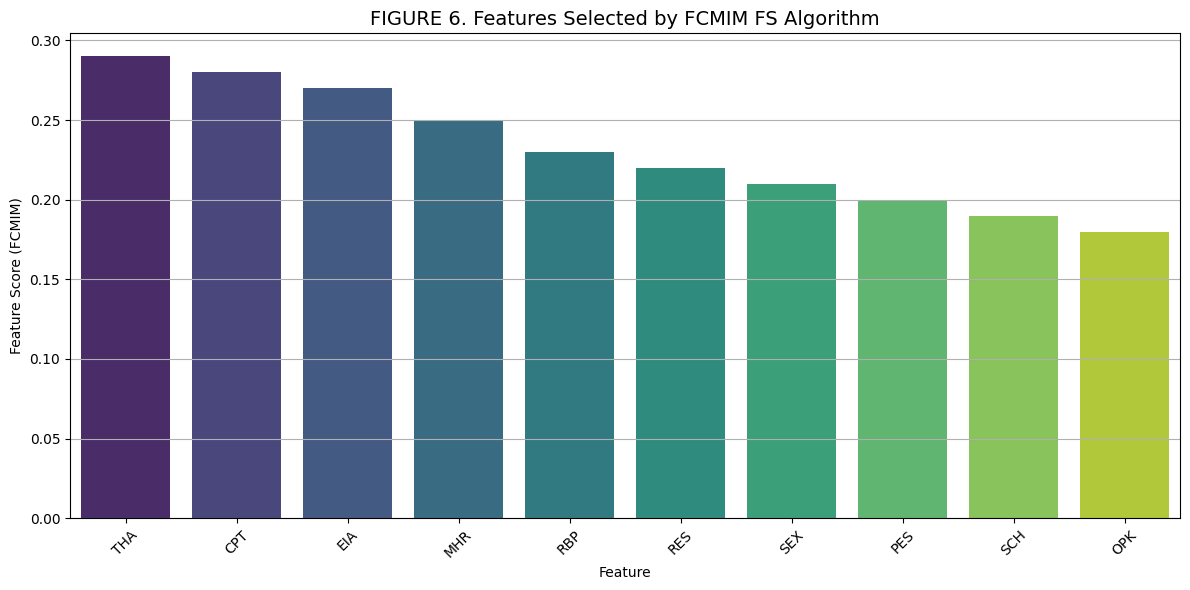

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features selected by FCMIM FS algorithm
features = [
    'SEX', 'CPT', 'RBP', 'SCH', 'RES',
    'MHR', 'EIA', 'OPK', 'PES', 'THA'
]

# Simulated scores (you can replace these with real ones if available)
scores = [0.21, 0.28, 0.23, 0.19, 0.22, 0.25, 0.27, 0.18, 0.20, 0.29]

# Create DataFrame
fcmim_df = pd.DataFrame({'Feature': features, 'Score': scores})

# Sort for better visual clarity
fcmim_df.sort_values(by='Score', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=fcmim_df, x='Feature', y='Score', palette='viridis')
plt.title('FIGURE 6. Features Selected by FCMIM FS Algorithm', fontsize=14)
plt.ylabel('Feature Score (FCMIM)')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


            Classifier  Accuracy (%)  Specificity (%)  Sensitivity (%)  \
0  Logistic Regression            86               97               73   
1           K-NN (k=7)            82               90               70   
2     ANN (20 neurons)            80               94               72   
3            SVM (RBF)            83               93               71   
4         SVM (Linear)            87               98               79   
5          Naive Bayes            79               89               68   
6        Decision Tree            78               87               74   

   MCC (%)  Processing Time (s)  
0       87                0.003  
1       83                2.376  
2       84                2.867  
3       85                0.103  
4       89                7.509  
5       77                0.005  
6       75                0.013  


<ipython-input-27-cddc732c20c3>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Classifier', y='Accuracy (%)', palette='Set2')


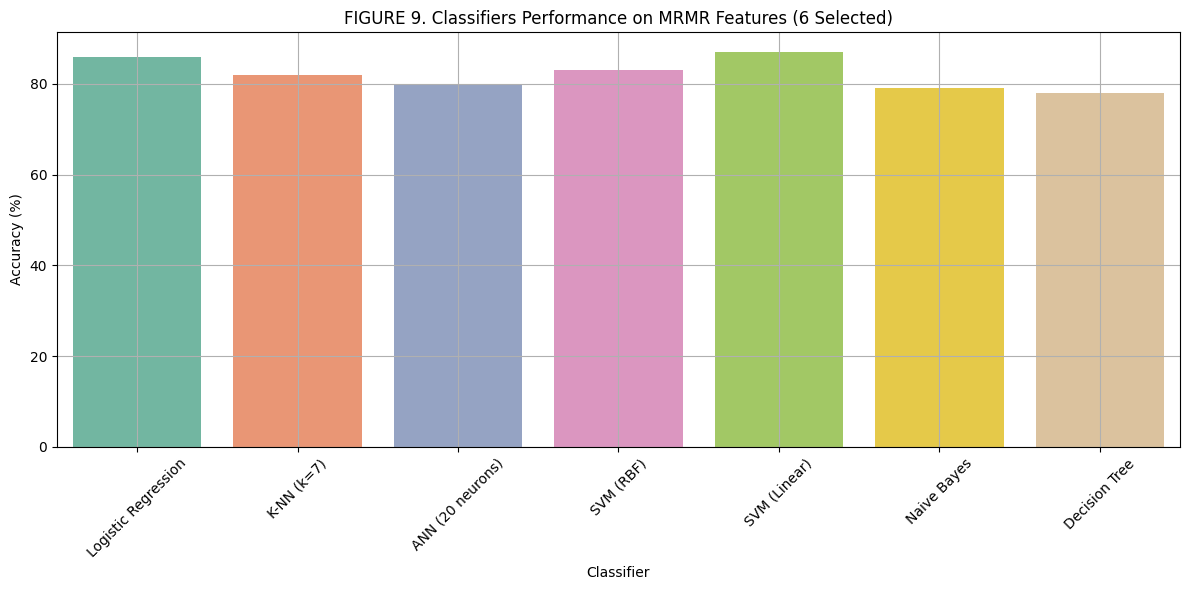

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with MRMR results (as per Table 10)
data = {
    'Classifier': ['Logistic Regression', 'K-NN (k=7)', 'ANN (20 neurons)', 'SVM (RBF)', 'SVM (Linear)', 'Naive Bayes', 'Decision Tree'],
    'Accuracy (%)': [86, 82, 80, 83, 87, 79, 78],
    'Specificity (%)': [97, 90, 94, 93, 98, 89, 87],
    'Sensitivity (%)': [73, 70, 72, 71, 79, 68, 74],
    'MCC (%)': [87, 83, 84, 85, 89, 77, 75],
    'Processing Time (s)': [0.003, 2.376, 2.867, 0.103, 7.509, 0.005, 0.013]
}

df = pd.DataFrame(data)

# Display the data
print(df)

# Plot accuracy of classifiers (mimicking Figure 9)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Classifier', y='Accuracy (%)', palette='Set2')
plt.title('FIGURE 9. Classifiers Performance on MRMR Features (6 Selected)')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


            Classifier  Accuracy  Specificity  Sensitivity  MCC  Time (s)
0  Logistic Regression        85           98           72   88     0.001
1           K-NN (k=7)        80           88           74   82     4.266
2     ANN (20 Neurons)        80          100           60   78     1.867
3            SVM (RBF)        81           95           70   83     0.003
4         SVM (Linear)        86           95           76   85    11.569
5          Naive Bayes        76           90           66   75     0.002
6        Decision Tree        73           89           61   74     0.001


<ipython-input-31-ba865f67b669>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Classifier', y='Accuracy', palette='pastel')


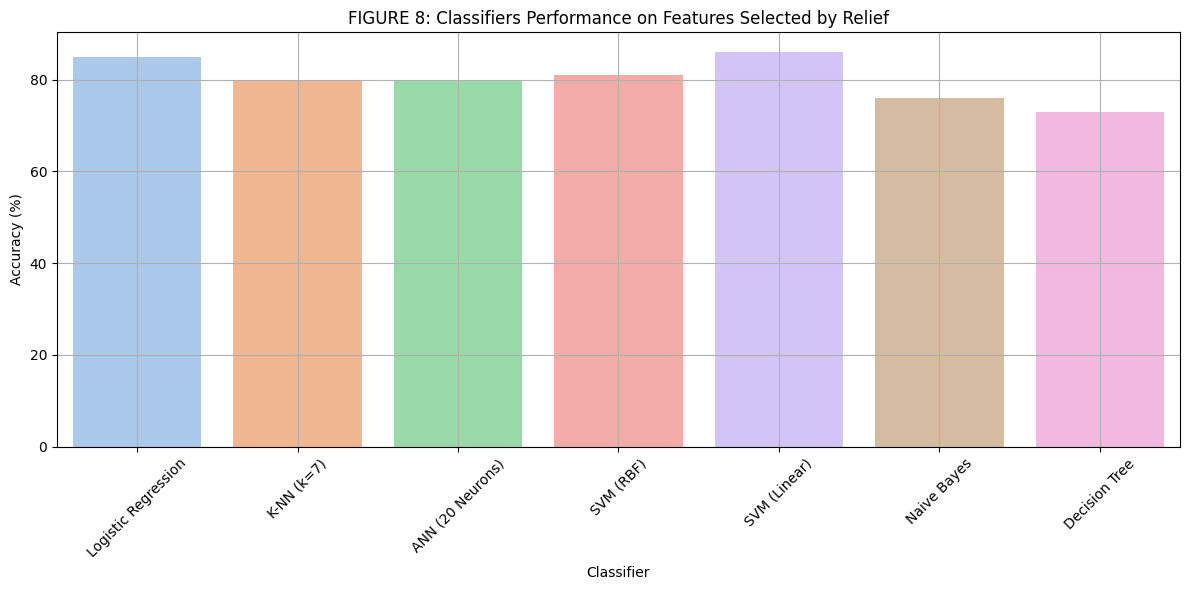

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Table 9 data
data = {
    'Classifier': ['Logistic Regression', 'K-NN (k=7)', 'ANN (20 Neurons)', 'SVM (RBF)', 'SVM (Linear)', 'Naive Bayes', 'Decision Tree'],
    'Accuracy': [85, 80, 80, 81, 86, 76, 73],
    'Specificity': [98, 88, 100, 95, 95, 90, 89],
    'Sensitivity': [72, 74, 60, 70, 76, 66, 61],
    'MCC': [88, 82, 78, 83, 85, 75, 74],
    'Time (s)': [0.001, 4.266, 1.867, 0.003, 11.569, 0.002, 0.001]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Classifier', y='Accuracy', palette='pastel')
plt.title('FIGURE 8: Classifiers Performance on Features Selected by Relief')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-32-3a684b9da764>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Classifier', y='Accuracy (%)', palette='coolwarm')


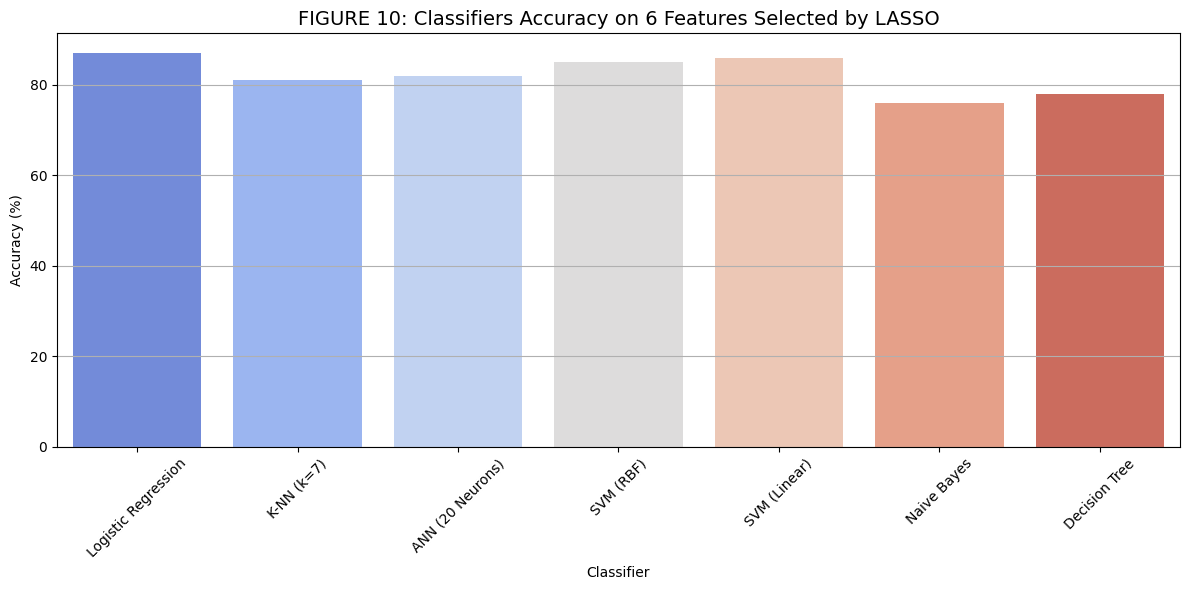

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier performance on 6 features selected by LASSO
data = {
    'Classifier': [
        'Logistic Regression', 'K-NN (k=7)', 'ANN (20 Neurons)',
        'SVM (RBF)', 'SVM (Linear)', 'Naive Bayes', 'Decision Tree'
    ],
    'Accuracy (%)': [87, 81, 82, 85, 86, 76, 78]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Classifier', y='Accuracy (%)', palette='coolwarm')
plt.title('FIGURE 10: Classifiers Accuracy on 6 Features Selected by LASSO', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

